# Basic Analysis

## Import Libraries

In [1]:
# Custom imports
from statisco.statistics import closingReturns, mean, variance, stdDev, covariance, correlation
import matplotlib.pyplot as plt

# Foreing Libraries
import yfinance as yf
import numpy as np
import math
import pandas as pd

plt.style.use('dark_background')

In [2]:
msft = yf.download("MSFT", period="1mo")
aapl = yf.download("AAPL", period="1mo")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
msft.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-15,417.899994,423.809998,417.269989,423.079987,423.079987,22239500
2024-05-16,421.799988,425.420013,420.350006,420.989990,420.989990,17530100
2024-05-17,422.540009,422.920013,418.029999,420.209991,420.209991,15352200
2024-05-20,420.209991,426.769989,419.989990,425.339996,425.339996,16272100
2024-05-21,426.829987,432.970001,424.850006,429.040009,429.040009,21453300


In [39]:
msft.tail()

,Open,High,Low,Close,Adj Close,Volume,MyCloseReturns,CloseReturns,SMA,mySMA,...,High-Low,High-PrevClose,Low-PrevClose,TrueRange,ATR,myATR,ATRwma,myATRwma,ATRema,myATRema
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-10,424.700012,428.079987,423.890015,427.869995,427.869995,14003000,0.009484,0.009484,425.413330,425.413330,...,4.189972,4.229980,0.040009,4.229980,6.484378,7.099282,6.731139,6.731139,6.484378,7.617853
2024-06-11,425.480011,432.820007,425.250000,432.679993,432.679993,14551100,0.011242,0.011242,428.133331,428.133331,...,7.570007,4.950012,2.619995,7.570007,6.629128,7.059998,6.793902,6.793902,6.629128,7.611473
2024-06-12,435.320007,443.399994,433.250000,441.059998,441.059998,22366200,0.019368,0.019368,433.869995,433.869995,...,10.149994,10.720001,0.570007,10.720001,7.174578,7.448569,7.281902,7.281902,7.174578,8.025944
2024-06-13,440.850006,443.390015,439.369995,441.579987,441.579987,15960600,0.001179,0.001179,438.439992,438.439992,...,4.020020,2.330017,1.690002,4.020020,6.753970,7.151428,6.824763,6.824763,6.753970,7.491821
2024-06-14,438.279999,443.140015,436.720001,442.570007,442.570007,13493100,0.000000,0.002242,441.736664,441.736664,...,6.420013,1.560028,4.859985,6.420013,6.709443,7.135001,6.727241,6.727241,6.709443,7.348913


### Close Returns

In [4]:
msft["MyCloseReturns"] = closingReturns(msft["Adj Close"])

In [5]:
aapl["MyCloseReturns"] = closingReturns(aapl["Adj Close"])

In [6]:
msft["CloseReturns"] = msft["Adj Close"].pct_change()

In [7]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume,MyCloseReturns,CloseReturns
Date,,,,,,,,
2024-05-15,417.899994,423.809998,417.269989,423.079987,423.079987,22239500,0.000000,NaN
2024-05-16,421.799988,425.420013,420.350006,420.989990,420.989990,17530100,-0.004940,-0.004940
2024-05-17,422.540009,422.920013,418.029999,420.209991,420.209991,15352200,-0.001853,-0.001853
2024-05-20,420.209991,426.769989,419.989990,425.339996,425.339996,16272100,0.012208,0.012208
2024-05-21,426.829987,432.970001,424.850006,429.040009,429.040009,21453300,0.008699,0.008699


## Statistics

### Mean

In [8]:
defaultMean = msft["MyCloseReturns"].mean()
myMean = mean(msft["MyCloseReturns"])
myMeanAapl = mean(aapl["MyCloseReturns"])

print(f"default pandas mean: {defaultMean}")
print(f"myMean: {myMean}")

default pandas mean: 0.002003633438000262
myMean: 0.002003633438000262


### Variance

In [9]:
defaultVariance = np.var(msft["MyCloseReturns"])
myVariance = variance(msft["MyCloseReturns"], myMean)
myVarianceAapl = variance(aapl["MyCloseReturns"], myMeanAapl)

print(f"default numpy variance: {defaultVariance}")
print(f"myMean: {myVariance}")

default numpy variance: 0.00011189841110737517
myMean: 0.00011189841110737518


### Std Dev

In [10]:
defaultStandardDeviation = msft["MyCloseReturns"].std()
myStandardDeviation = stdDev(msft["MyCloseReturns"], myMean)
myStandardDeviationAapl = stdDev(aapl["MyCloseReturns"], myMeanAapl)

print(f"default numpy std dev: {defaultStandardDeviation}")
print(f"myStandardDeviation: {myStandardDeviation}")

default numpy std dev: 0.01082713751987999
myStandardDeviation: 0.010578204531364252


### Covariance

In [11]:
covariance_matrix = np.cov(msft["MyCloseReturns"], aapl["MyCloseReturns"])
covariance_value = covariance_matrix[0, 1]

myCovariance = covariance(msft["MyCloseReturns"], myMean, aapl["MyCloseReturns"], myMeanAapl)

print(f"defualt covariance: {covariance_value}")
print(f"myCovariance: {myCovariance}")

defualt covariance: 6.017296088301332e-05
myCovariance: 6.017296088301333e-05


### Correlation

In [12]:
correlation_coefficient = np.corrcoef(msft["MyCloseReturns"], aapl["MyCloseReturns"])[0, 1]
myCorrelation = correlation(myCovariance, myVariance, myVarianceAapl)

In [13]:
print(f"defualt correlation: {correlation_coefficient}")
print(f"myCorrelation: {myCorrelation}")

defualt correlation: 0.3033764787651889
myCorrelation: 0.3178229777540075


## Financial Calculations

In [14]:
from statisco.finance import compoundInterest, moneyMadeInAYear, compoundInterestTime, expectedValue

### Compound Interest
- **Principal**: Initial amount of money invested or loaned.
- **Interest Rate**: The percentage of the principal that is charged or paid over a certain period. An interest rate of 5% means that 5% of the principal will be added to or deducted from the principal each period.
- **Time Period**: Duration for which the money is invested or borrowed.

In [15]:
def compound_interest(principal, interest_rate, time_period):
    # Check if the inputs are valid
    if time_period < 0:
        raise ValueError("Time cannot be negative.")
    
    # Calculate compound interest using the formula A = P * (1 + r)^t
    future_value = principal * (1 + interest_rate) ** time_period
    return future_value

In [16]:
principal = 1000.0
itr = 0.05
t = 2.0
cmpi = compoundInterest(principal, itr, t)
default_cmpi = compound_interest(principal, itr, t)
print(f"compound interest: {cmpi}")
print(f"default compound interest: {default_cmpi}")

compound interest: 1102.5
default compound interest: 1102.5


### Money Made in a Year

In [17]:
def money_made_in_a_year(P_t, r_t, t_t):
    return r_t * (P_t * (1 + r_t) ** t_t)

principal = 1000.0
interest_rate = 0.05
time_period = 2.0

mmiay = moneyMadeInAYear(principal, itr, t)
default_mmiay = money_made_in_a_year(principal, itr, t)
print(f"Money Made in a Year: {mmiay}")
print(f"default money made in a year: {default_mmiay}")

Money Made in a Year: 55.125
default money made in a year: 55.125


### Compound Interest

In [18]:
def compound_interest_time(r_t):
    """
    Calculate the time it takes for compound interest to reach a factor.
    """
    return -math.log(r_t) / math.log(1 + r_t)

interest_rate = 0.05  # Example interest rate (5%)
compound_time = compound_interest_time(interest_rate)
cmpt = compoundInterestTime(interest_rate)

print(f"Default compound interest time: {compound_time} years")
print(f"cmpt: {cmpt} years")

Default compound interest time: 61.40033190195481 years
cmpt: 61.40033190195481 years


### Expected Value

In [19]:
def expected_value(avg_loss, prob_loss, avg_gain, prob_gain):return (avg_loss * prob_loss) + (avg_gain * prob_gain)

# Example usage:
avg_loss = -10.0   # Average loss amount
prob_loss = 0.3    # Probability of a loss
avg_gain = 20.0    # Average gain amount
prob_gain = 0.7    # Probability of a gain

defaultEV = expected_value(avg_loss, prob_loss, avg_gain, prob_gain)
EV = expectedValue(avg_loss, prob_loss, avg_gain, prob_gain)
print(f"Default expected value: {defaultEV} ")
print(f"expected value: {EV}")

Default expected value: 11.0 
expected value: 11.0


## Indicators

In [20]:
from statisco.indicators.MAs import SMA, EMA, WMA
from statisco.indicators.ATRs import ATR, ATRwma, ATRema

### SMA

In [21]:
def calculate_sma(data, window):
    sma = np.convolve(data, np.ones(window)/window, mode='valid')
    return sma

In [22]:
window_size = 3
msft['SMA'] = msft['Close'].rolling(window=window_size).mean()
msft['mySMA'] = SMA(msft['Close'], 3)

In [23]:
msft.tail(5)

,Open,High,Low,Close,Adj Close,Volume,MyCloseReturns,CloseReturns,SMA,mySMA
Date,,,,,,,,,,
2024-06-10,424.700012,428.079987,423.890015,427.869995,427.869995,14003000,0.009484,0.009484,425.413330,425.413330
2024-06-11,425.480011,432.820007,425.250000,432.679993,432.679993,14551100,0.011242,0.011242,428.133331,428.133331
2024-06-12,435.320007,443.399994,433.250000,441.059998,441.059998,22366200,0.019368,0.019368,433.869995,433.869995
2024-06-13,440.850006,443.390015,439.369995,441.579987,441.579987,15960600,0.001179,0.001179,438.439992,438.439992
2024-06-14,438.279999,443.140015,436.720001,442.570007,442.570007,13493100,0.000000,0.002242,441.736664,441.736664


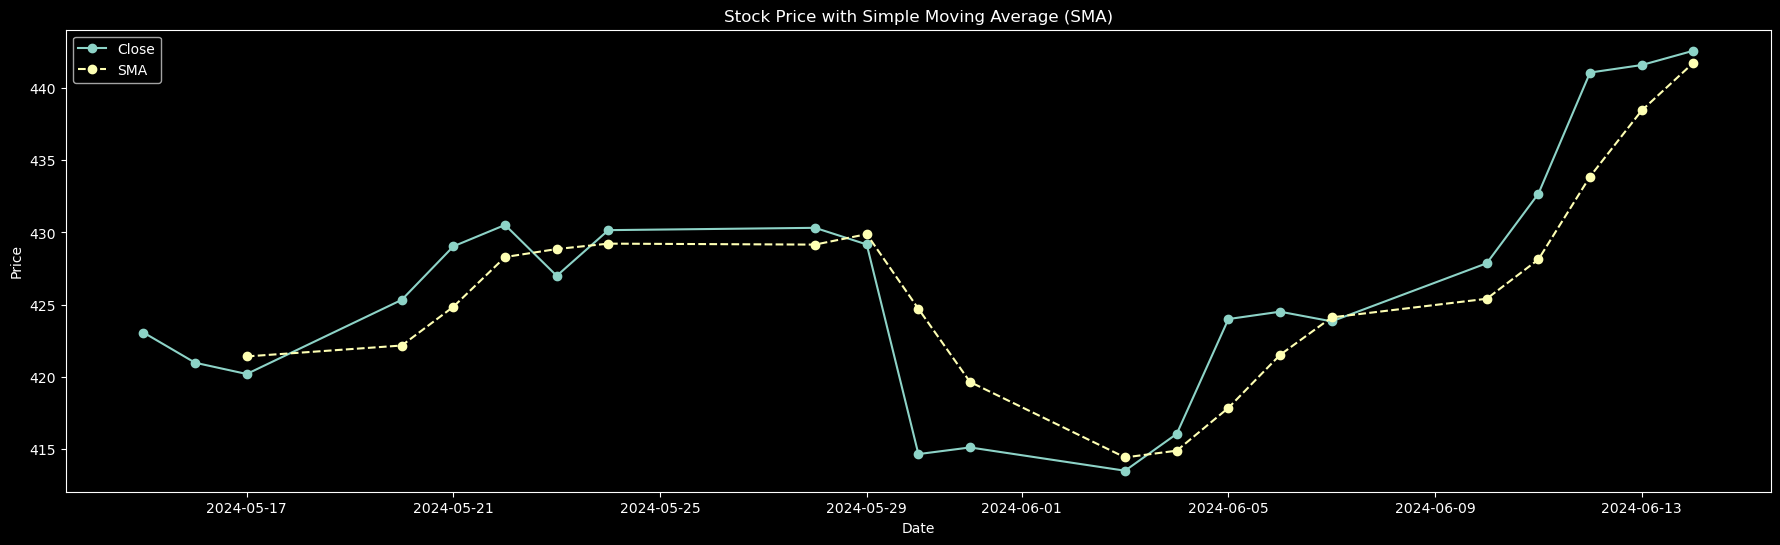

In [24]:
# Plotting
plt.figure(figsize=(22, 6))
plt.plot(msft.index, msft['Close'], label='Close', marker='o')
plt.plot(msft.index, msft['mySMA'], label='SMA', linestyle='--', marker='o')
plt.title('Stock Price with Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### EMA

In [25]:
def calculateEMA(close_prices, sma_values, smooth, window_size):
    multiplier = smooth / (window_size + 1)
    ema_values = [None] * (window_size - 1)  # Initialize with None for the initial window period

    # Initialize the first EMA value using the corresponding SMA value
    ema_values.append(sma_values.iloc[window_size - 1])

    # Calculate the EMA for each subsequent close price
    for i in range(window_size, len(close_prices)):
        ema_value = close_prices.iloc[i] * multiplier + ema_values[-1] * (1 - multiplier)
        ema_values.append(ema_value)

    return ema_values
smooth_value = 2  # You can adjust this value based on your preference
window_size = 3  # Adjust the window size based on your requirements
msft['EMA'] = ema_values = calculateEMA(msft['Close'], msft['mySMA'], smooth_value, window_size)
msft['myEMA'] = EMA(msft['Close'], msft['mySMA'], window_size, smooth_value)

In [26]:
msft.tail(5)

,Open,High,Low,Close,Adj Close,Volume,MyCloseReturns,CloseReturns,SMA,mySMA,EMA,myEMA
Date,,,,,,,,,,,,
2024-06-10,424.700012,428.079987,423.890015,427.869995,427.869995,14003000,0.009484,0.009484,425.413330,425.413330,425.466894,425.466876
2024-06-11,425.480011,432.820007,425.250000,432.679993,432.679993,14551100,0.011242,0.011242,428.133331,428.133331,429.073444,429.073434
2024-06-12,435.320007,443.399994,433.250000,441.059998,441.059998,22366200,0.019368,0.019368,433.869995,433.869995,435.066721,435.066716
2024-06-13,440.850006,443.390015,439.369995,441.579987,441.579987,15960600,0.001179,0.001179,438.439992,438.439992,438.323354,438.323351
2024-06-14,438.279999,443.140015,436.720001,442.570007,442.570007,13493100,0.000000,0.002242,441.736664,441.736664,440.446680,440.446679


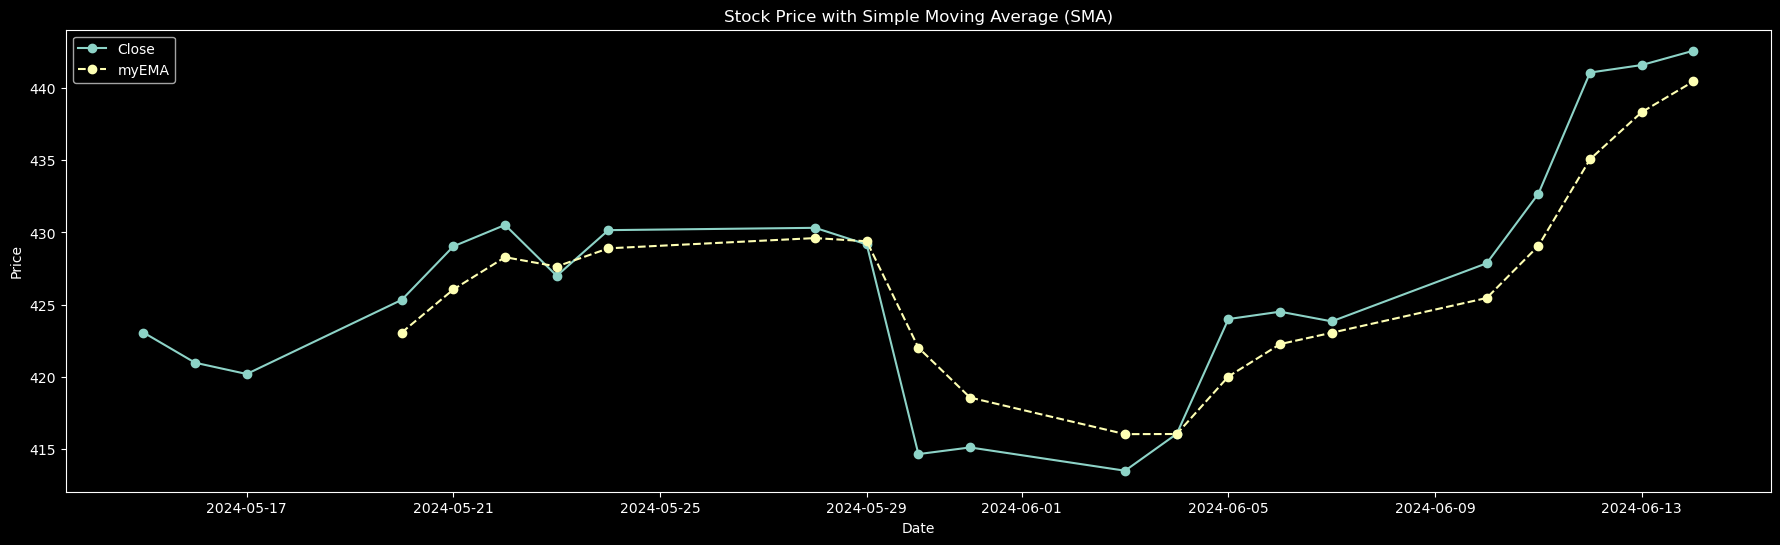

In [27]:
# Plotting
plt.figure(figsize=(22, 6))
plt.plot(msft.index, msft['Close'], label='Close', marker='o')
plt.plot(msft.index[3:], msft['myEMA'][3:], label='myEMA', linestyle='--', marker='o')
plt.title('Stock Price with Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### WMA

In [28]:
def calculateWMA(df_t, numberOfDays_t):
	"""
	@brief	Calculates the weighted moving average

	@params	df_t			This dataframe with the stocks data
			numberOfDays	the period of days to calculate
							the average
	
	@returns	a list containing the calculated WMA
	"""
	WMA = []
	weight = 0
	for i in range(1, numberOfDays_t+1):
		weight += i
	for i in range(0, numberOfDays_t-1):
		WMA.append(0)
	for i in range(numberOfDays_t, len(df_t.Close) + 1):
		sum = 0
		counter = 1
		for j in range(i-numberOfDays_t, i):
			sum += df_t.Close[j] * (counter/weight) 
			counter += 1
		WMA.append(sum)
	
	return WMA

msft['WMA'] = calculateWMA(msft, window_size)
msft['myWMA'] = WMA(msft['Close'], window_size)

/run/user/1000/ipykernel_170624/2141784433.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum += df_t.Close[j] * (counter/weight)


In [29]:
print(msft.head(10))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-05-15  417.899994  423.809998  417.269989  423.079987  423.079987   
2024-05-16  421.799988  425.420013  420.350006  420.989990  420.989990   
2024-05-17  422.540009  422.920013  418.029999  420.209991  420.209991   
2024-05-20  420.209991  426.769989  419.989990  425.339996  425.339996   
2024-05-21  426.829987  432.970001  424.850006  429.040009  429.040009   
2024-05-22  430.089996  432.410004  427.130005  430.519989  430.519989   
2024-05-23  432.970001  433.600006  425.420013  427.000000  427.000000   
2024-05-24  427.190002  431.059998  424.410004  430.160004  430.160004   
2024-05-28  429.630005  430.820007  426.600006  430.320007  430.320007   
2024-05-29  425.690002  430.940002  425.690002  429.170013  429.170013   

              Volume  MyCloseReturns  CloseReturns         SMA       mySMA  \
Date                             

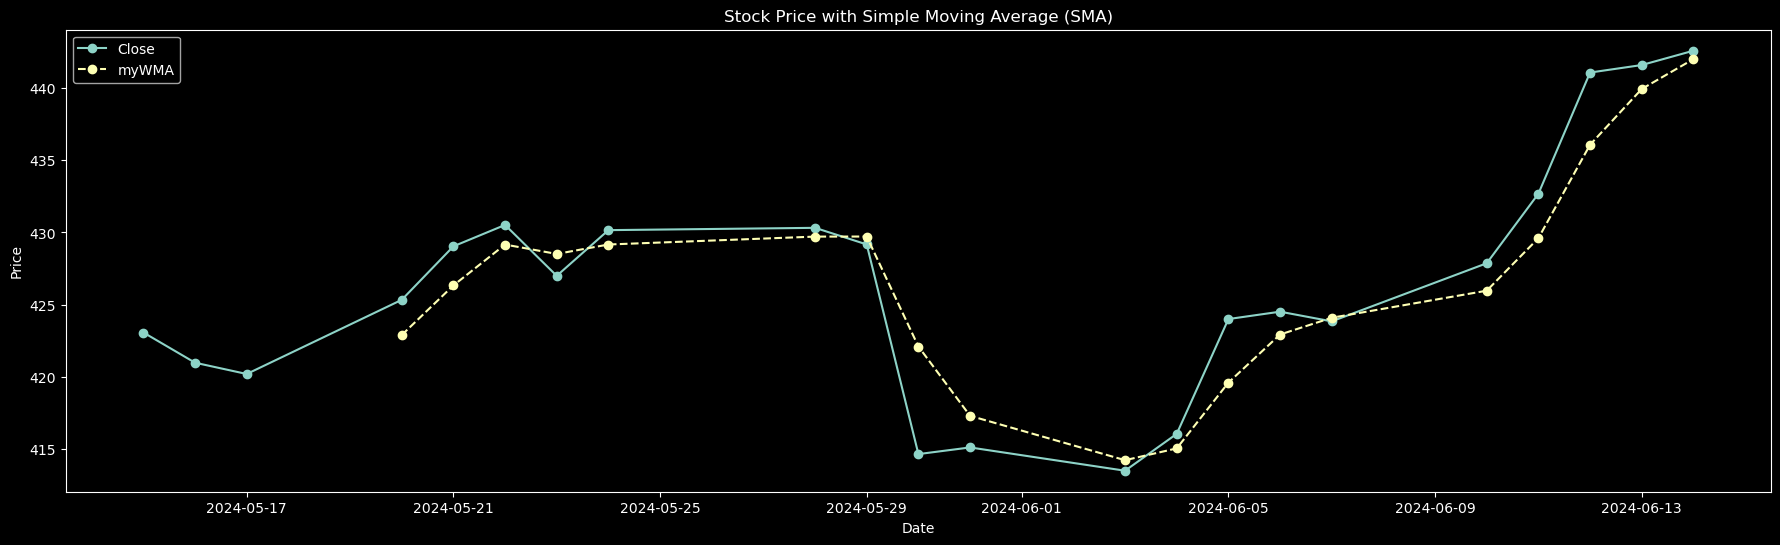

In [30]:
# Plotting
plt.figure(figsize=(22, 6))
plt.plot(msft.index, msft['Close'], label='Close', marker='o')
plt.plot(msft.index[3:], msft['myWMA'][3:], label='myWMA', linestyle='--', marker='o')
plt.title('Stock Price with Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## ATR

In [31]:
def calculate_atr(data, period=14):
    # Calculate True Range (TR)
    data['High-Low'] = data['High'] - data['Low']
    data['High-PrevClose'] = abs(data['High'] - data['Close'].shift(1))
    data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift(1))

    data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)

    # Calculate ATR
    data['ATR'] = data['TrueRange'].rolling(window=period).mean()

    # Drop temporary columns
    data = data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose', 'TrueRange'], axis=1)

    return data['ATR']
msft['ATR'] = calculate_atr(msft)
msft['myATR'] = ATR(msft['Close'], msft['High'], msft['Low'], 14)

In [32]:
print(msft.tail(8))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-06-05  417.809998  424.079987  416.299988  424.010010  424.010010   
2024-06-06  424.010010  425.309998  420.579987  424.519989  424.519989   
2024-06-07  426.200012  426.279999  423.000000  423.850006  423.850006   
2024-06-10  424.700012  428.079987  423.890015  427.869995  427.869995   
2024-06-11  425.480011  432.820007  425.250000  432.679993  432.679993   
2024-06-12  435.320007  443.399994  433.250000  441.059998  441.059998   
2024-06-13  440.850006  443.390015  439.369995  441.579987  441.579987   
2024-06-14  438.279999  443.140015  436.720001  442.570007  442.570007   

              Volume  MyCloseReturns  CloseReturns         SMA       mySMA  \
Date                                                                         
2024-06-05  16988000        0.019083      0.019083  417.866669  417.866669   
2024-06-06  14861300     

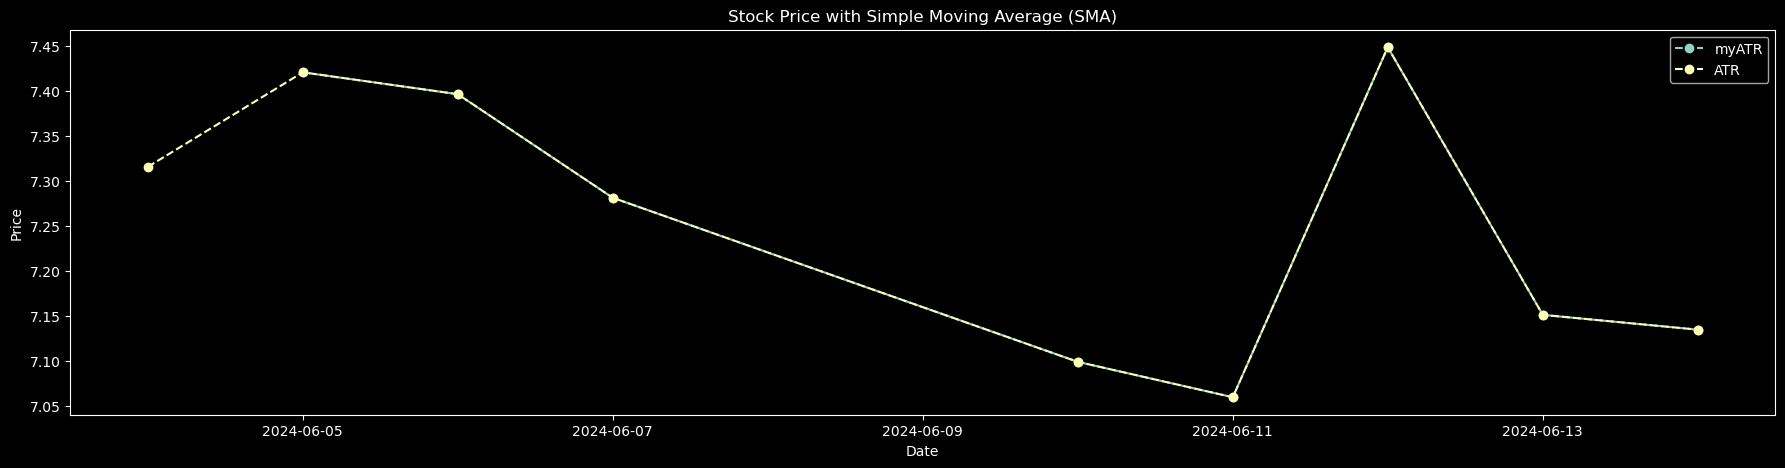

In [33]:
# Plotting
plt.figure(figsize=(22, 5))
# plt.plot(msft.index, msft['Close'], label='Close', marker='o')
plt.plot(msft.index[14:], msft['myATR'][14:], label='myATR', linestyle='--', marker='o')
plt.plot(msft.index, msft['ATR'], label='ATR', linestyle='--', marker='o')
plt.title('Stock Price with Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### ATR WMA

In [34]:
def atr_wma(data, period=14):
    # Calculate True Range (TR)
    data['High-Low'] = data['High'] - data['Low']
    data['High-PrevClose'] = abs(data['High'] - data['Close'].shift(1))
    data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift(1))

    data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)

    # Calculate Weighted Moving Average (WMA) of True Range
    data['WMA'] = data['TrueRange'].rolling(window=period).apply(lambda x: (x * range(1, period + 1)).sum() / ((period * (period + 1)) / 2), raw=True)

    # Drop temporary columns
    data = data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose', 'TrueRange'], axis=1)

    return data['WMA']
msft['ATRwma'] = atr_wma(msft)
msft['myATRwma'] = ATRwma(msft['Close'], msft['High'], msft['Low'], 14)

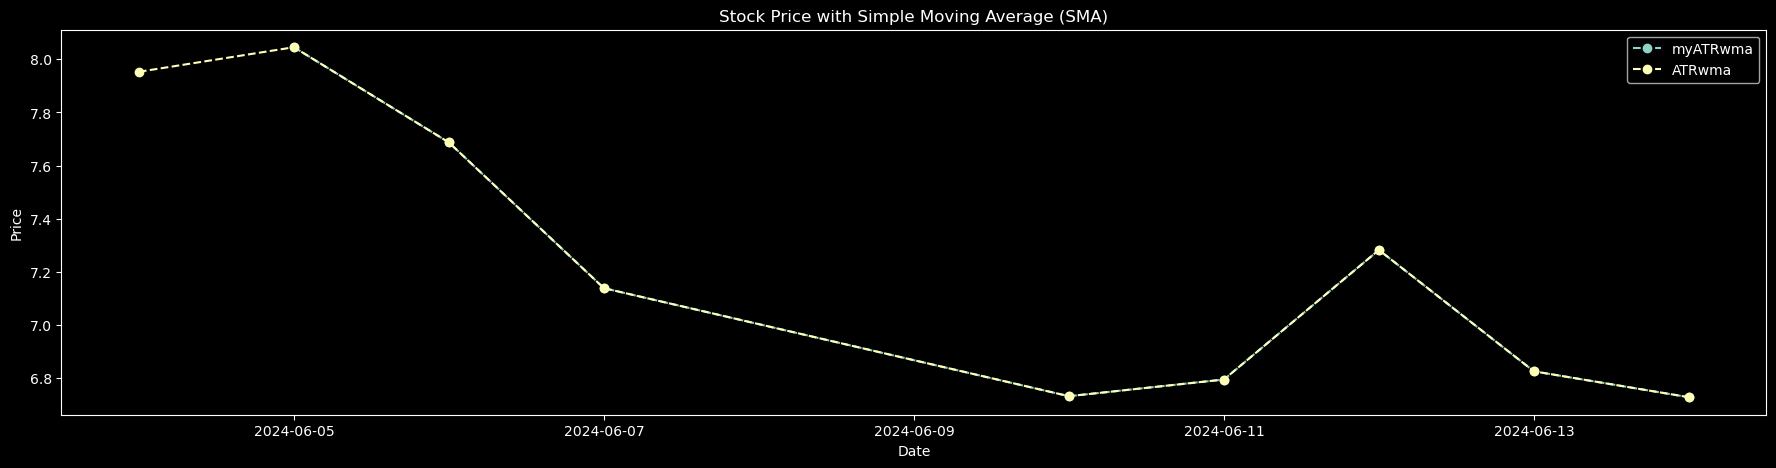

In [35]:
plt.figure(figsize=(22, 5))
# plt.plot(msft.index, msft['Close'], label='Close', marker='o')
plt.plot(msft.index[14:], msft['myATRwma'][14:], label='myATRwma', linestyle='--', marker='o')
plt.plot(msft.index, msft['ATRwma'], label='ATRwma', linestyle='--', marker='o')
plt.title('Stock Price with Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
msft[["myATRwma", "ATRwma"]].tail()

,myATRwma,ATRwma
Date,,
2024-06-10,6.731139,6.731139
2024-06-11,6.793902,6.793902
2024-06-12,7.281902,7.281902
2024-06-13,6.824763,6.824763
2024-06-14,6.727241,6.727241
